# Regression Analysis

Created by Ying Ma. 3/14/2018

Load all game stats, and use regression analysis to get coefficients for each parameter.

In [203]:
import pandas as pd
import numpy as np
import urllib3
from bs4 import BeautifulSoup
import time
from datetime import date, datetime
from selenium import webdriver
import copy
from dateutil import relativedelta
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, levene, bartlett
from glob import glob
import os
from sklearn.linear_model import Lasso, Lars, lars_path, LinearRegression
from sklearn.model_selection import GridSearchCV

In [204]:
pathname = 'C:/Users/mysel/Dropbox/datascience bootcamp/NBA/csv/'
filenames =  glob(pathname + '*.csv')

In [205]:

df_sum=pd.DataFrame()
for i in range(0,len(filenames)):
        os.chdir(pathname)
        df = pd.read_csv(filenames[i],encoding = 'ISO-8859-1')  
        df_sum = df_sum.append(df, ignore_index= True)
df_sum.rename(columns={'\xa0.1':'Win'}, inplace=True)     

In [206]:
# numerify
df_sum['Win'] = [int(df_sum['Win'][i].split()[1][1:-1]) for i in range(len(df_sum['Win']))]

In [207]:
df_sum.columns

Index(['Unnamed: 0', 'Name', 'Event', 'ED', 'Pre/Post', 'Rk', 'Date', 'Offset',
       'Tm', ' ', 'Opp', 'Win', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'ORtg', 'DRtg', 'OR_Team',
       'DR_Team'],
      dtype='object')

In [224]:
# use lasso for parameter choosing

y = np.array(df_sum['Win'])
X = np.array(df_sum[['FG', 'FGA','3P', '3PA',
        'FT', 'FTA',  'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS']])

lasso = Lasso(max_iter = 10000)
alphas = np.linspace(0, 10, 11)

grid = GridSearchCV(lasso, 
                    param_grid = {'alpha' : alphas}
                    )
grid.fit(X,y)
y_hat = grid.predict(X)
grid.best_score_

C:\Users\mysel\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mysel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\mysel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mysel\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:

0.078545864927376932

In [236]:
y

array([ 10,  12,  11,   6,   6, -15,   9,   8,  -6,  12,  -1, -25,  11,
        17,   7,   8,   9,  -8,  25, -13,   9,   5, -19,  -8, -19,  -6,
         6,   2,   6,  19,  -6,  -7,   5,   1,  -1,  30,  -7,  -3,  -7,
         8,  10,   3,   7,  -5,   5,  10,  -2,   7,   7,  12,  -5, -15,
       -10, -20,   4,  10, -11,  15, -13,  12,   8,  27,  24,   4,  -1,
       -27,  12,  -4,  -3, -17,  11,   6,   5,   4,   3, -14,   6, -19,
         9,  13,   6,  14, -11,  -8,   1,  -7,   5,  -8,  -4,  -9, -18,
        -9,  12, -10, -10,   6,  -2,  -4,  16, -16,  10, -11, -14, -15,
        10,   8,  12,   6,   9,  -3, -14,  -5,  11, -14,   3,  -4,  12,
         7,  -3,  -3, -26,   9,   7, -17, -10,   9, -19, -15,   7, -33,
        30,   4,   5, -11,  -6,   7, -18,  -5,   4,  -7, -13,   3,   1,
        14,  16,  39,  -3,  -2,   3,   1,  23,  -9, -11,  -3,  10,   7,
         3,   4,  18,   7,  -7,  16,  -5,  -1, -11,  -5,   6,  -4,  10,
        -2, -13, -24,   9,  43,  24,   5,  -5,  29,  36,  17,   

In [231]:
from sklearn.linear_model import LinearRegression
ls= LinearRegression(normalize = False, fit_intercept= True)
ls.fit(X,y)
y_hat = ls.predict(X)
ls.score(X,y)

0.16662731003526851

In [237]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(penalty = 'l1',)
lr.fit(X,y>0)
y_hat = lr.predict_proba(X)
lr.score(X,y>0)

0.66182572614107882

C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
C:\Users\mysel\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\mysel\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


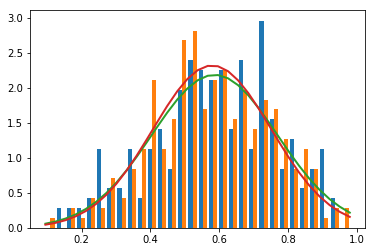

In [239]:
#n, bins, patches = plt.hist(y_hat[:,1][df_sum['Pre/Post']=='Pre'], 10, normed=1, facecolor='green', alpha=0.75)

n, bins, patches =plt.hist([y_hat[:,1][df_sum['Pre/Post']=='Pre'],y_hat[:,1][df_sum['Pre/Post']=='Post']],30,normed =1)
plt.hold(True)
(mu, sigma) = norm.fit(y_hat[:,1][df_sum['Pre/Post']=='Pre'])
tc = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, tc, linewidth=2)

(mu, sigma) = norm.fit(y_hat[:,1][df_sum['Pre/Post']=='Post'])
tc = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, tc, linewidth=2)
#plt.hist(y_hat[:,1][df_sum['Pre/Post']=='Post'])
plt.show()

In [240]:
lr.coef_

array([[ 0.        , -0.12699594, -0.1034719 ,  0.08070658,  0.0600686 ,
        -0.12092841,  0.01947422,  0.        ,  0.05898385,  0.08797633,
         0.14749818,  0.34569354, -0.21704756, -0.20423614,  0.1330171 ]])

C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\mysel\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\mysel\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


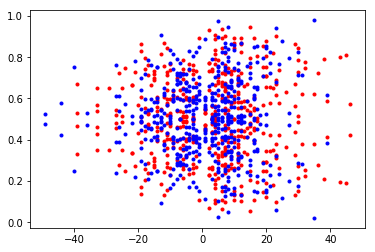

In [241]:
plt.plot(y[df_sum['Pre/Post']=='Pre'],y_hat[df_sum['Pre/Post']=='Pre'],'r.')
plt.hold(True)
plt.plot(y[df_sum['Pre/Post']=='Post'],y_hat[df_sum['Pre/Post']=='Post'],'b.')
plt.show()

In [189]:
ttest_ind(y[df_sum['Pre/Post']=='Pre'],y[df_sum['Pre/Post']=='Post'])

Ttest_indResult(statistic=0.92204089111514742, pvalue=0.35697045365258961)

C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\mysel\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\mysel\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


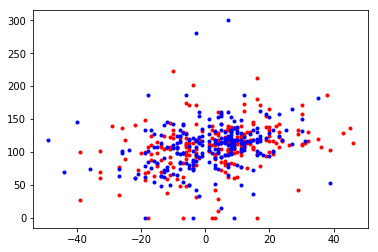

In [242]:
plt.plot(df_sum['Win'][df_sum['Pre/Post']=='Pre'],df_sum['ORtg'][df_sum['Pre/Post']=='Pre'],'r.')
plt.hold(True)
plt.plot(df_sum['Win'][df_sum['Pre/Post']=='Post'],df_sum['ORtg'][df_sum['Pre/Post']=='Post'],'b.')
plt.show()